# Library

In [3]:
import pandas as pd
import numpy as np
import json
import os


In [4]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

# Read Data

In [5]:
data = pd.read_json('/Users/azzanf/Documents/Azza/BIGBOX/Clusterring/Code/ecommerce.json')

In [6]:
df = pd.DataFrame(data)

In [7]:
df['new_date'] = [d.date() for d in df['timestamp']]
df['new_time'] = [d.time() for d in df['timestamp']]

In [8]:
dtypes=pd.DataFrame(df.dtypes,columns=["Data Type"])
dtypes["Null Values"]=df.isnull().sum()
dtypes["% null Values"]=df.isnull().sum()/len(data)
dtypes.style.background_gradient(cmap='Set2',axis=0)
dtypes

,Data Type,Null Values,% null Values
id,object,0,0.000000
bundle,object,0,0.000000
bundle_name,object,0,0.000000
content,object,67,0.012848
spell,object,0,0.000000
content_date,object,0,0.000000
entity_id,int64,0,0.000000
entity_type,object,0,0.000000
label,object,0,0.000000
is_price,int64,0,0.000000


In [9]:
df_c = df
# df_a = d_with_index.loc["Perawatan Hewan", "Deals"]
def remove_unused_columns(df):
  df = df.drop(columns='is_wishlist')
  df = df.drop(columns='is_product_view')
  df = df.drop(columns='is_product_sold')
  df = df.drop(columns='is_product_success')
  df = df.drop(columns='is_product_reject')
  df = df.drop(columns='timestamp')
  df = df.drop(columns='ss_url_image')
  df = df.drop(columns='entity_type')
  df = df.drop(columns='_version_')
  df = df.drop(columns='ss_currency')
  df = df.drop(columns='sm_review_message')
  df = df.drop(columns='sm_review_user_name')
  return df

df_c = remove_unused_columns(df_c)

In [10]:
df_c.columns

Index(['id', 'bundle', 'bundle_name', 'content', 'spell', 'content_date',
       'entity_id', 'label', 'is_price', 'is_product_id', 'is_shop_id',
       'fs_rating', 'fs_best_rating', 'fs_worst_rating', 'fs_review',
       'ss_shop_name', 'ss_location', 'sm_review_rate', 'sm_review_time',
       'sm_review_user_id', 'new_date', 'new_time'],
      dtype='object')

In [11]:
fw_a = df_c[df_c['bundle_name'] == 'Fashion Wanita']

In [12]:
# Price Range
def range(x):
  if 0<=x<=50000:
      return 'Rp0 - Rp50.000'
  if 50001<=x<=200000:
      return 'Rp50.001 - Rp200.000'
  if 200001<=x<=500000:
      return 'Rp200.001 - Rp500.000'
  if 500001<=x<=1000000:
      return 'Rp500.001 - Rp1.000.000'
  if 1000001<=x<=2000000:
      return 'Rp1.000.001 - Rp2.000.000'
  if 2000001<=x<=5000000:
      return 'Rp2.000.001 - Rp5.000.000'

  # if('Price_Range' in fw_a):
fw_a['price_range']=fw_a['is_price'].apply(range)
    # fw_a = fw_a.drop(columns = 'Price_Range')

/var/folders/pn/ytzvyh0905n7snvnj4dds6kc0000gn/T/ipykernel_81992/3159076909.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fw_a['price_range']=fw_a['is_price'].apply(range)


In [13]:
# Dropping Null Value
fw_a= fw_a.dropna(subset = ['sm_review_rate'])

In [14]:
# Counting Null Value
fw_a['sm_review_rate'].isna().sum()

0

In [ ]:
# Changing review rate object to int
rate = [ ] 
for x in fw_a['sm_review_rate']:
  inrate = []
  print(x)
  for a in x:
    inrate.append(int(a))
  rate.append(inrate)
fw_a['sm_review_rate'] = rate

In [ ]:
rate

In [17]:
# replace orig_column with the correct column name
fw_a['review_rate_total'] = (fw_a['sm_review_rate'].str.extractall('-(\d+)')
                 .astype(int).sum(level=0)
                 .reindex(df.index, fill_value=0)
              )

/var/folders/pn/ytzvyh0905n7snvnj4dds6kc0000gn/T/ipykernel_81992/2173184301.py:2: FutureWarning: Using the level keyword in DataFrame and Series aggregations is deprecated and will be removed in a future version. Use groupby instead. df.sum(level=1) should use df.groupby(level=1).sum().
  fw_a['review_rate_total'] = (fw_a['sm_review_rate'].str.extractall('-(\d+)')


In [18]:
fw_a['review_rate_total'] = fw_a['sm_review_rate'].explode().astype(float).sum(level=0)

/var/folders/pn/ytzvyh0905n7snvnj4dds6kc0000gn/T/ipykernel_81992/3999430776.py:1: FutureWarning: Using the level keyword in DataFrame and Series aggregations is deprecated and will be removed in a future version. Use groupby instead. df.sum(level=1) should use df.groupby(level=1).sum().
  fw_a['review_rate_total'] = fw_a['sm_review_rate'].explode().astype(float).sum(level=0)


In [19]:
fw_a

,id,bundle,bundle_name,content,spell,content_date,entity_id,label,is_price,is_product_id,...,fs_review,ss_shop_name,ss_location,sm_review_rate,sm_review_time,sm_review_user_id,new_date,new_time,price_range,review_rate_total
0,https://www.tokopedia.com/haetamisibri/kets-ai...,tokopedia,Fashion Wanita,Sempurnakan penampilan cantik anda setiap hari...,[Sempurnakan penampilan cantik anda setiap har...,2019-02-07T12:30:30Z,7,"Jual KETS AIR MAX V3 MERAH ,KETS dengan harga ...",45000,248515751,...,16.0,AMI_SHOES,Kab. Bogor,"[2, 5, 5, 3, 1, 4, 4, 5, 5, 5, 5, 5, 5, 5, 4, 5]","[2018-08-05T18:39:38Z, 2018-07-17T09:22:33Z, 2...","[26251789, 18963683, 18963683, 34738909, 35686...",2019-02-07,12:30:30.395000,Rp0 - Rp50.000,68.0
1,https://www.tokopedia.com/haetamisibri/sepatu-...,tokopedia,Fashion Wanita,Sempurnakan penampilan cantik anda setiap hari...,[Sempurnakan penampilan cantik anda setiap har...,2019-02-07T12:15:18Z,7,"Jual sepatu wanita slip on an 04 abu ,SLIP ON ...",44000,342762424,...,NaN,AMI_SHOES,Kab. Bogor,"[5, 3, 5, 2, 4, 3, 4, 4, 4, 5, 3, 4]","[2019-02-07T18:37:29Z, 2019-01-24T15:46:42Z, 2...","[48154081, 36420218, 42063331, 2252752, 357788...",2019-02-07,12:15:18.948000,Rp0 - Rp50.000,46.0
2,https://www.tokopedia.com/cicisetiyashop/sepat...,tokopedia,Fashion Wanita,Terbuat Dari bahan suede tinggi 8cm Ready Ukur...,[Terbuat Dari bahan suede tinggi 8cm Ready Uku...,2019-02-07T12:10:26Z,7,Jual Sepatu Wanita Cewek High Heels Wedges Mur...,90000,375237378,...,99.0,Cici Setiya Shop,Kota Administrasi Jakarta Barat,"[5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, ...","[2019-02-06T14:33:05Z, 2019-02-06T14:27:55Z, 2...","[28682212, 28686129, 28583383, 28584040, 28709...",2019-02-07,12:10:26.961000,Rp50.001 - Rp200.000,100.0
3,https://www.tokopedia.com/haetamisibri/boots-s...,tokopedia,Fashion Wanita,Sempurnakan penampilan cantik anda setiap hari...,[Sempurnakan penampilan cantik anda setiap har...,2019-02-07T12:45:36Z,7,"Jual BOOTS SNIKER ZR22 PUTIH ,BOOTS dengan har...",66000,267708100,...,15.0,AMI_SHOES,Kab. Bogor,"[5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 4, 5, 5, 5, 5]","[2018-12-27T17:10:38Z, 2018-12-19T15:47:21Z, 2...","[28661789, 28661789, 1246019, 23195849, 267766...",2019-02-07,12:45:36.399000,Rp50.001 - Rp200.000,74.0
4,https://www.tokopedia.com/haetamisibri/kets-m-...,tokopedia,Fashion Wanita,Sempurnakan penampilan cantik anda setiap hari...,[Sempurnakan penampilan cantik anda setiap har...,2019-02-07T13:15:28Z,7,"Jual KETS M JALA HITAM ,KETS dengan harga Rp 4...",41000,247854793,...,10.0,AMI_SHOES,Kab. Bogor,"[4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 3]","[2018-12-25T21:22:25Z, 2018-12-03T20:58:43Z, 2...","[43904539, 0, 13574758, 17263060, 18963683, 18...",2019-02-07,13:15:29.204000,Rp0 - Rp50.000,52.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5191,https://www.tokopedia.com/cafana/sepatu-wanita...,tokopedia,Fashion Wanita,Ready : Silver 37 38 39 40 Gold 37 38 39 40 Ba...,[Ready : Silver 37 38 39 40 Gold 37 38 39 40 B...,2019-02-08T12:31:13Z,7,"Jual Sepatu Wanita Kets Casual OC SDS212 ,:: S...",44800,213361329,...,109.0,CAFANA STORE,Kota Depok,"[2, 4, 4, 5, 5, 5, 4, 4, 5, 3, 4, 3, 5, 3, 5, ...","[2019-01-11T16:27:44Z, 2018-12-26T14:54:26Z, 2...","[21672351, 36508676, 7790310, 15487949, 154879...",2019-02-08,12:31:13.612000,Rp0 - Rp50.000,86.0
5192,https://www.tokopedia.com/cafana/sepatu-wanita...,tokopedia,Fashion Wanita,** MOHON DIBACA ** Jika size masih terdapat pa...,[** MOHON DIBACA ** Jika size masih terdapat p...,2019-02-08T12:31:14Z,7,"Jual Sepatu Wanita Kets Casual N SDS113 ,:: SE...",44800,43608995,...,627.0,CAFANA STORE,Kota Depok,"[5, 5, 5, 5, 5, 5, 4, 5, 4, 4, 5, 5, 5, 5, 3, ...","[2019-02-01T15:43:38Z, 2019-01-30T18:46:36Z, 2...","[44432896, 13919401, 19592462, 46509791, 43382...",2019-02-08,12:31:15.096000,Rp0 - Rp50.000,95.0
5193,https://www.tokopedia.com/premiumsocks/kaos-ka...,tokopedia,Fashion Wanita,"KAOS KAKI PREMIUM, DENGAN HARGA MURAH Kelebiha...","[KAOS KAKI PREMIUM, DENGAN HARG

In [20]:
# import pandas as pd
# import numpy as np
# import seaborn as sns
# import matplotlib.pyplot as plt
# from sklearn.preprocessing import StandardScaler
# from sklearn.cluster import KMeans

# # Load data
# df = pd.read_csv("ecommerce_data.csv")

# # Data exploration
# print(df.head())     # Display first 5 rows of the data
# print(df.shape)      # Display number of rows and columns
# print(df.describe()) # Display summary statistics of the data

# # Data cleaning
# df.dropna(inplace=True)   # Drop missing values
# df.drop_duplicates(inplace=True)  # Drop duplicates

# # Feature scaling
# scaler = StandardScaler()
# df_scaled = scaler.fit_transform(df)

# # Elbow plot to determine the number of clusters
# wcss = []
# for i in range(1, 11):
#     kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
#     kmeans.fit(df_scaled)
#     wcss.append(kmeans.inertia_)
# plt.plot(range(1, 11), wcss)
# plt.title('Elbow Plot')
# plt.xlabel('Number of Clusters')
# plt.ylabel('WCSS')
# plt.show()

# # Clustering
# kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, n_init=10, random_state=0)
# pred_y = kmeans.fit_predict(df_scaled)

# # Visualization
# plt.scatter(df_scaled[:,0], df_scaled[:,1])
# plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red')
# plt.title('Clustered Data')
# plt.xlabel('Feature 1')
# plt.ylabel('Feature 2')
# plt.show()


In [21]:
# Order dataframe based on is_price
fw_a = fw_a.sort_values(by=['is_price'])

In [22]:
# change data types from object to categorical
fw_a['price_range'] = fw_a['price_range'].astype('category')


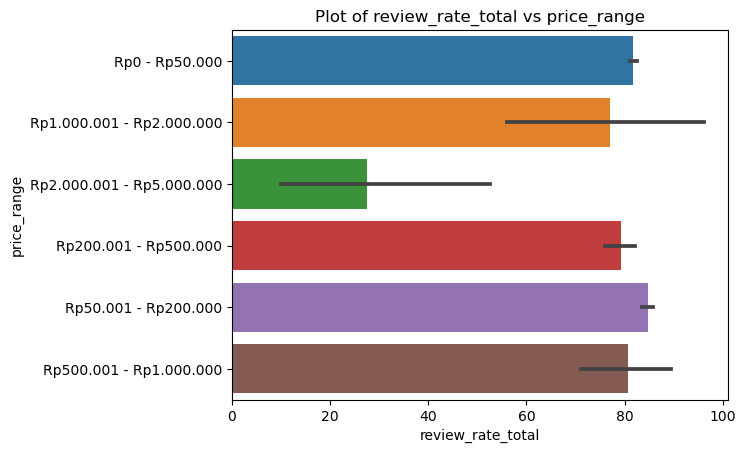

In [23]:
sns.barplot(x='review_rate_total', y='price_range', data=fw_a)
plt.title('Plot of review_rate_total vs price_range')
plt.xlabel('review_rate_total')
plt.ylabel('price_range')
plt.show()


In [24]:
# Use apply function to count the total number of integers in each list
fw_a['review_count'] = fw_a['sm_review_rate'].apply(len)

fw_a

,id,bundle,bundle_name,content,spell,content_date,entity_id,label,is_price,is_product_id,...,ss_shop_name,ss_location,sm_review_rate,sm_review_time,sm_review_user_id,new_date,new_time,price_range,review_rate_total,review_count
4625,https://www.tokopedia.com/bengkelsepatu77/plas...,tokopedia,Fashion Wanita,UNTUK MENGHINDARI CACAT PENGIRIMAN GUNAKAN LAH...,[UNTUK MENGHINDARI CACAT PENGIRIMAN GUNAKAN LA...,2019-02-08T11:53:13Z,7,"Jual PLASTIK BUBBLE ,flatshoes dengan harga Rp...",1000,83052718,...,bengkelsepatu77,Kota Bogor,"[5, 1, 4, 4, 4, 4, 4, 5, 4, 5, 4, 5, 5, 5, 5, ...","[2018-06-05T21:02:26Z, 2018-05-16T17:12:08Z, 2...","[23335221, 287317, 1426912, 1426912, 1426912, ...",2019-02-08,11:53:13.795000,Rp0 - Rp50.000,89.0,20
4014,https://www.tokopedia.com/siantarmaju/harga-ed...,tokopedia,Fashion Wanita,"!!! PERHATIAN !!! Ini sandal anak, warna sanda...","[!!! PERHATIAN !!! Ini sandal anak, warna sand...",2019-02-08T12:09:12Z,7,Jual Harga EDAN Rp.250/psg ada lagi !!! (Harap...,1500,34702731,...,SIANTARMAJU dot COM,Kota Surabaya,"[5, 5, 5, 5, 5, 5, 5, 5, 5, 1, 5, 5, 5, 5, 5, ...","[2019-01-07T16:40:04Z, 2018-12-30T19:10:32Z, 2...","[35169914, 24842026, 8855294, 5836410, 368995,...",2019-02-08,12:09:12.797000,Rp0 - Rp50.000,96.0,20
4141,https://www.tokopedia.com/tokojilbabyahya/tali...,tokopedia,Fashion Wanita,panjang-+55cm cocok untuk sepatu kantoran.. st...,[panjang-+55cm cocok untuk sepatu kantoran.. s...,2019-02-08T11:33:16Z,7,Jual tali sepatu / tali sepatu formal/ tali se...,1700,37518120,...,TOKO YAHYA,DKI Jakarta,"[5, 5, 5, 5, 5, 4, 5, 5, 5, 5, 5, 4, 5, 5, 4, ...","[2019-01-02T14:26:05Z, 2018-11-23T08:35:22Z, 2...","[3519302, 4642673, 6214095, 21087950, 0, 27462...",2019-02-08,11:33:17.187000,Rp0 - Rp50.000,92.0,20
5020,https://www.tokopedia.com/tokojilbabyahya/tali...,tokopedia,Fashion Wanita,ukuran 90cm warna 1. merah 2. Hijau 3. hijau b...,[ukuran 90cm warna 1. merah 2. Hijau 3. hijau ...,2019-02-08T12:12:23Z,7,Jual tali sepatu warna/harga sepasang/murah ba...,2000,27224456,...,TOKO YAHYA,DKI Jakarta,"[5, 5, 5, 5, 5, 4, 5, 5, 5, 5, 5, 5, 5, 5, 4, ...","[2019-01-31T07:07:06Z, 2019-01-30T12:39:12Z, 2...","[0, 19355017, 0, 37334226, 39345884, 10600969,...",2019-02-08,12:12:23.864000,Rp0 - Rp50.000,98.0,20
4807,https://www.tokopedia.com/murahdankualitas/pab...,tokopedia,Fashion Wanita,Pabrik kaos kaki sekolah putih hitam Ukuran SD...,[Pabrik kaos kaki sekolah putih hitam Ukuran S...,2019-02-08T12:30:34Z,7,"Jual Pabrik kaos kaki sekolah SD murah ,Kaos k...",2000,24132957,...,hideakhi,Kab. Bandung,"[5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 4, 5, 5, 5, ...","[2019-02-06T12:44:03Z, 2019-01-12T14:48:12Z, 2...","[13561173, 19897129, 3712158, 2285561, 2158362...",2019-02-08,12:30:34.738000,Rp0 - Rp50.000,99.0,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2722,https://www.tokopedia.com/sneakerhitsind/sepat...,tokopedia,Fashion Wanita,FILA DISRUPTOR 2 WHITE WHITE Payday Special : ...,[FILA DISRUPTOR 2 WHITE WHITE Payday Special :...,2019-02-08T02:50:23Z,7,Jual SEPATU FILA DISRUPTOR 2 WHITE WHITE ORIGI...,1950000,322374259,...,Sneakerhits,DKI Jakarta,"[5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, ...","[2019-01-06T17:03:15Z, 2018-12-17T11:04:23Z, 2...","[3947897, 0, 1542499, 0, 6224608, 0, 0, 173444...",2019-02-08,02:50:23.417000,Rp1.000.001 - Rp2.000.000,90.0,18
4996,https://www.tokopedia.com/kevinwinata18/adidas...,tokopedia,Fashion Wanita,#nerdbosskevinwreadystock '' Adidas NMD R1 PK ...,[#nerdbosskevinwreadystock '' Adidas NMD R1 PK...,2019-02-08T11:31:12Z,7,Jual Adidas NMD R1 PK W Ice Blue BNIB 100% Aut...,2300999,292610296,...,Kevin Winata,Kota Palembang,[5],[2018-07-08T15:44:08Z],[0],2019-02-08,11:31:12.328000,Rp2.000.001 - Rp5.000.000,5.0,1
1876,https://www.tokopedia.com/cherishstores/sepatu...,tokopedia,Fashion Wanita,>>>Jual cepet NMD XR1 (Green) Size UK 8. RECEI...,[>>>Jual cepet NMD XR1 (Green) Size UK 8. RECE...,2019-02-08T06:46:30Z,7,Jual Sepatu NMD XR1 Camo Duck &amp;amp;#39;Gre...,3

In [25]:
# define a function to compute the mean of a list
def compute_mean(lst):
    print(lst)
    return sum(lst) / len(lst)



In [26]:
# apply the compute_mean function to each list in the 'numbers' column
fw_a['mean'] = fw_a['sm_review_rate'].apply(compute_mean)

fw_a


[5, 1, 4, 4, 4, 4, 4, 5, 4, 5, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5]
[5, 5, 5, 5, 5, 5, 5, 5, 5, 1, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5]
[5, 5, 5, 5, 5, 4, 5, 5, 5, 5, 5, 4, 5, 5, 4, 3, 4, 5, 5, 3]
[5, 5, 5, 5, 5, 4, 5, 5, 5, 5, 5, 5, 5, 5, 4, 5, 5, 5, 5, 5]
[5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 4, 5, 5, 5, 5, 5, 5, 5, 5]
[5, 5, 5, 5, 5, 5, 4, 5, 5, 5, 3, 4, 5, 5, 5, 5, 5, 5, 5, 5]
[5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5]
[5, 5, 5, 5, 5, 5, 5, 4, 4, 5, 5, 5, 4, 5, 5, 5, 4, 5, 5, 5]
[4, 4, 4, 2, 5, 5, 1, 5, 3, 5, 5, 3, 5, 4, 5, 4, 5, 3, 4, 5]
[5, 5, 5, 5, 5, 5, 5, 5, 4, 3, 5, 5, 4, 5, 5, 5, 3, 5, 4, 5]
[5, 5, 3, 5, 5, 5, 4, 5, 2, 5, 5, 5, 5, 5, 4, 5, 3, 4, 5, 4]
[5, 5, 5, 5, 5, 5, 5, 4, 5, 5, 5, 3, 4, 4, 5, 4, 5, 5, 5, 4]
[5, 5, 5, 4, 5, 4, 5, 3, 5, 4, 5, 4, 5, 5, 5, 5, 5, 4, 5, 5]
[5, 5, 4, 5, 5, 5, 5, 5, 5, 3, 5, 4, 5, 5, 3, 5, 5, 5, 3, 3]
[5, 5, 5, 5, 5, 5, 5, 5, 4, 5, 5, 5, 4, 4, 5, 4, 4, 5, 3, 5]
[4, 5, 5, 5, 5, 5, 5, 5, 4, 5, 5, 5, 5, 4, 4, 5, 5, 5, 5, 5]
[4, 5, 5, 5, 3, 5, 5, 5,

,id,bundle,bundle_name,content,spell,content_date,entity_id,label,is_price,is_product_id,...,ss_location,sm_review_rate,sm_review_time,sm_review_user_id,new_date,new_time,price_range,review_rate_total,review_count,mean
4625,https://www.tokopedia.com/bengkelsepatu77/plas...,tokopedia,Fashion Wanita,UNTUK MENGHINDARI CACAT PENGIRIMAN GUNAKAN LAH...,[UNTUK MENGHINDARI CACAT PENGIRIMAN GUNAKAN LA...,2019-02-08T11:53:13Z,7,"Jual PLASTIK BUBBLE ,flatshoes dengan harga Rp...",1000,83052718,...,Kota Bogor,"[5, 1, 4, 4, 4, 4, 4, 5, 4, 5, 4, 5, 5, 5, 5, ...","[2018-06-05T21:02:26Z, 2018-05-16T17:12:08Z, 2...","[23335221, 287317, 1426912, 1426912, 1426912, ...",2019-02-08,11:53:13.795000,Rp0 - Rp50.000,89.0,20,4.45
4014,https://www.tokopedia.com/siantarmaju/harga-ed...,tokopedia,Fashion Wanita,"!!! PERHATIAN !!! Ini sandal anak, warna sanda...","[!!! PERHATIAN !!! Ini sandal anak, warna sand...",2019-02-08T12:09:12Z,7,Jual Harga EDAN Rp.250/psg ada lagi !!! (Harap...,1500,34702731,...,Kota Surabaya,"[5, 5, 5, 5, 5, 5, 5, 5, 5, 1, 5, 5, 5, 5, 5, ...","[2019-01-07T16:40:04Z, 2018-12-30T19:10:32Z, 2...","[35169914, 24842026, 8855294, 5836410, 368995,...",2019-02-08,12:09:12.797000,Rp0 - Rp50.000,96.0,20,4.80
4141,https://www.tokopedia.com/tokojilbabyahya/tali...,tokopedia,Fashion Wanita,panjang-+55cm cocok untuk sepatu kantoran.. st...,[panjang-+55cm cocok untuk sepatu kantoran.. s...,2019-02-08T11:33:16Z,7,Jual tali sepatu / tali sepatu formal/ tali se...,1700,37518120,...,DKI Jakarta,"[5, 5, 5, 5, 5, 4, 5, 5, 5, 5, 5, 4, 5, 5, 4, ...","[2019-01-02T14:26:05Z, 2018-11-23T08:35:22Z, 2...","[3519302, 4642673, 6214095, 21087950, 0, 27462...",2019-02-08,11:33:17.187000,Rp0 - Rp50.000,92.0,20,4.60
5020,https://www.tokopedia.com/tokojilbabyahya/tali...,tokopedia,Fashion Wanita,ukuran 90cm warna 1. merah 2. Hijau 3. hijau b...,[ukuran 90cm warna 1. merah 2. Hijau 3. hijau ...,2019-02-08T12:12:23Z,7,Jual tali sepatu warna/harga sepasang/murah ba...,2000,27224456,...,DKI Jakarta,"[5, 5, 5, 5, 5, 4, 5, 5, 5, 5, 5, 5, 5, 5, 4, ...","[2019-01-31T07:07:06Z, 2019-01-30T12:39:12Z, 2...","[0, 19355017, 0, 37334226, 39345884, 10600969,...",2019-02-08,12:12:23.864000,Rp0 - Rp50.000,98.0,20,4.90
4807,https://www.tokopedia.com/murahdankualitas/pab...,tokopedia,Fashion Wanita,Pabrik kaos kaki sekolah putih hitam Ukuran SD...,[Pabrik kaos kaki sekolah putih hitam Ukuran S...,2019-02-08T12:30:34Z,7,"Jual Pabrik kaos kaki sekolah SD murah ,Kaos k...",2000,24132957,...,Kab. Bandung,"[5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 4, 5, 5, 5, ...","[2019-02-06T12:44:03Z, 2019-01-12T14:48:12Z, 2...","[13561173, 19897129, 3712158, 2285561, 2158362...",2019-02-08,12:30:34.738000,Rp0 - Rp50.000,99.0,20,4.95
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2722,https://www.tokopedia.com/sneakerhitsind/sepat...,tokopedia,Fashion Wanita,FILA DISRUPTOR 2 WHITE WHITE Payday Special : ...,[FILA DISRUPTOR 2 WHITE WHITE Payday Special :...,2019-02-08T02:50:23Z,7,Jual SEPATU FILA DISRUPTOR 2 WHITE WHITE ORIGI...,1950000,322374259,...,DKI Jakarta,"[5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, ...","[2019-01-06T17:03:15Z, 2018-12-17T11:04:23Z, 2...","[3947897, 0, 1542499, 0, 6224608, 0, 0, 173444...",2019-02-08,02:50:23.417000,Rp1.000.001 - Rp2.000.000,90.0,18,5.00
4996,https://www.tokopedia.com/kevinwinata18/adidas...,tokopedia,Fashion Wanita,#nerdbosskevinwreadystock '' Adidas NMD R1 PK ...,[#nerdbosskevinwreadystock '' Adidas NMD R1 PK...,2019-02-08T11:31:12Z,7,Jual Adidas NMD R1 PK W Ice Blue BNIB 100% Aut...,2300999,292610296,...,Kota Palembang,[5],[2018-07-08T15:44:08Z],[0],2019-02-08,11:31:12.328000,Rp2.000.001 - Rp5.000.000,5.0,1,5.00
1876,https://www.tokopedia.com/cherishstores/sepatu...,tokopedia,Fashion Wanita,>>>Jual cepet NMD XR1 (Green) Size UK 8. RECEI...,[>>>Jual cepet NMD XR1 (Green) Size UK 8. RECE...,2019-02-08T06:46:30Z,7,Jual Sepatu NMD XR1 Camo Duck &amp;amp;#39;Gre...,3000000,99397174,...,DKI Jakarta,"[5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5

In [27]:
fw_a

,id,bundle,bundle_name,content,spell,content_date,entity_id,label,is_price,is_product_id,...,ss_location,sm_review_rate,sm_review_time,sm_review_user_id,new_date,new_time,price_range,review_rate_total,review_count,mean
4625,https://www.tokopedia.com/bengkelsepatu77/plas...,tokopedia,Fashion Wanita,UNTUK MENGHINDARI CACAT PENGIRIMAN GUNAKAN LAH...,[UNTUK MENGHINDARI CACAT PENGIRIMAN GUNAKAN LA...,2019-02-08T11:53:13Z,7,"Jual PLASTIK BUBBLE ,flatshoes dengan harga Rp...",1000,83052718,...,Kota Bogor,"[5, 1, 4, 4, 4, 4, 4, 5, 4, 5, 4, 5, 5, 5, 5, ...","[2018-06-05T21:02:26Z, 2018-05-16T17:12:08Z, 2...","[23335221, 287317, 1426912, 1426912, 1426912, ...",2019-02-08,11:53:13.795000,Rp0 - Rp50.000,89.0,20,4.45
4014,https://www.tokopedia.com/siantarmaju/harga-ed...,tokopedia,Fashion Wanita,"!!! PERHATIAN !!! Ini sandal anak, warna sanda...","[!!! PERHATIAN !!! Ini sandal anak, warna sand...",2019-02-08T12:09:12Z,7,Jual Harga EDAN Rp.250/psg ada lagi !!! (Harap...,1500,34702731,...,Kota Surabaya,"[5, 5, 5, 5, 5, 5, 5, 5, 5, 1, 5, 5, 5, 5, 5, ...","[2019-01-07T16:40:04Z, 2018-12-30T19:10:32Z, 2...","[35169914, 24842026, 8855294, 5836410, 368995,...",2019-02-08,12:09:12.797000,Rp0 - Rp50.000,96.0,20,4.80
4141,https://www.tokopedia.com/tokojilbabyahya/tali...,tokopedia,Fashion Wanita,panjang-+55cm cocok untuk sepatu kantoran.. st...,[panjang-+55cm cocok untuk sepatu kantoran.. s...,2019-02-08T11:33:16Z,7,Jual tali sepatu / tali sepatu formal/ tali se...,1700,37518120,...,DKI Jakarta,"[5, 5, 5, 5, 5, 4, 5, 5, 5, 5, 5, 4, 5, 5, 4, ...","[2019-01-02T14:26:05Z, 2018-11-23T08:35:22Z, 2...","[3519302, 4642673, 6214095, 21087950, 0, 27462...",2019-02-08,11:33:17.187000,Rp0 - Rp50.000,92.0,20,4.60
5020,https://www.tokopedia.com/tokojilbabyahya/tali...,tokopedia,Fashion Wanita,ukuran 90cm warna 1. merah 2. Hijau 3. hijau b...,[ukuran 90cm warna 1. merah 2. Hijau 3. hijau ...,2019-02-08T12:12:23Z,7,Jual tali sepatu warna/harga sepasang/murah ba...,2000,27224456,...,DKI Jakarta,"[5, 5, 5, 5, 5, 4, 5, 5, 5, 5, 5, 5, 5, 5, 4, ...","[2019-01-31T07:07:06Z, 2019-01-30T12:39:12Z, 2...","[0, 19355017, 0, 37334226, 39345884, 10600969,...",2019-02-08,12:12:23.864000,Rp0 - Rp50.000,98.0,20,4.90
4807,https://www.tokopedia.com/murahdankualitas/pab...,tokopedia,Fashion Wanita,Pabrik kaos kaki sekolah putih hitam Ukuran SD...,[Pabrik kaos kaki sekolah putih hitam Ukuran S...,2019-02-08T12:30:34Z,7,"Jual Pabrik kaos kaki sekolah SD murah ,Kaos k...",2000,24132957,...,Kab. Bandung,"[5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 4, 5, 5, 5, ...","[2019-02-06T12:44:03Z, 2019-01-12T14:48:12Z, 2...","[13561173, 19897129, 3712158, 2285561, 2158362...",2019-02-08,12:30:34.738000,Rp0 - Rp50.000,99.0,20,4.95
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2722,https://www.tokopedia.com/sneakerhitsind/sepat...,tokopedia,Fashion Wanita,FILA DISRUPTOR 2 WHITE WHITE Payday Special : ...,[FILA DISRUPTOR 2 WHITE WHITE Payday Special :...,2019-02-08T02:50:23Z,7,Jual SEPATU FILA DISRUPTOR 2 WHITE WHITE ORIGI...,1950000,322374259,...,DKI Jakarta,"[5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, ...","[2019-01-06T17:03:15Z, 2018-12-17T11:04:23Z, 2...","[3947897, 0, 1542499, 0, 6224608, 0, 0, 173444...",2019-02-08,02:50:23.417000,Rp1.000.001 - Rp2.000.000,90.0,18,5.00
4996,https://www.tokopedia.com/kevinwinata18/adidas...,tokopedia,Fashion Wanita,#nerdbosskevinwreadystock '' Adidas NMD R1 PK ...,[#nerdbosskevinwreadystock '' Adidas NMD R1 PK...,2019-02-08T11:31:12Z,7,Jual Adidas NMD R1 PK W Ice Blue BNIB 100% Aut...,2300999,292610296,...,Kota Palembang,[5],[2018-07-08T15:44:08Z],[0],2019-02-08,11:31:12.328000,Rp2.000.001 - Rp5.000.000,5.0,1,5.00
1876,https://www.tokopedia.com/cherishstores/sepatu...,tokopedia,Fashion Wanita,>>>Jual cepet NMD XR1 (Green) Size UK 8. RECEI...,[>>>Jual cepet NMD XR1 (Green) Size UK 8. RECE...,2019-02-08T06:46:30Z,7,Jual Sepatu NMD XR1 Camo Duck &amp;amp;#39;Gre...,3000000,99397174,...,DKI Jakarta,"[5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5

In [28]:
print(fw_a['sm_review_rate'].dtype)


object


In [29]:
# fw_a['mean'] = fw_a['sm_review_rate'].mean()

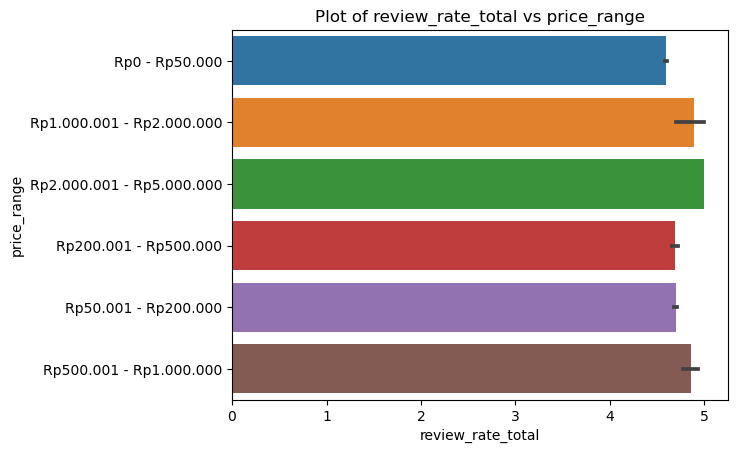

In [30]:
sns.barplot(x='mean', y='price_range', data=fw_a)
plt.title('Plot of review_rate_total vs price_range')
plt.xlabel('review_rate_total')
plt.ylabel('price_range')
plt.show()


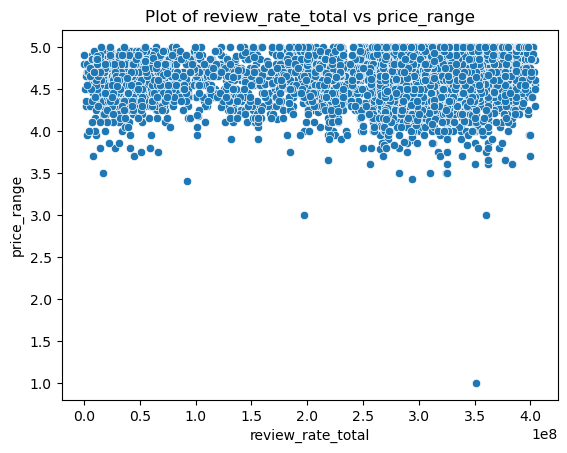

In [31]:
sns.scatterplot(x='is_product_id', y='mean', data=fw_a)
plt.title('Plot of review_rate_total vs price_range')
plt.xlabel('review_rate_total')
plt.ylabel('price_range')
plt.show()

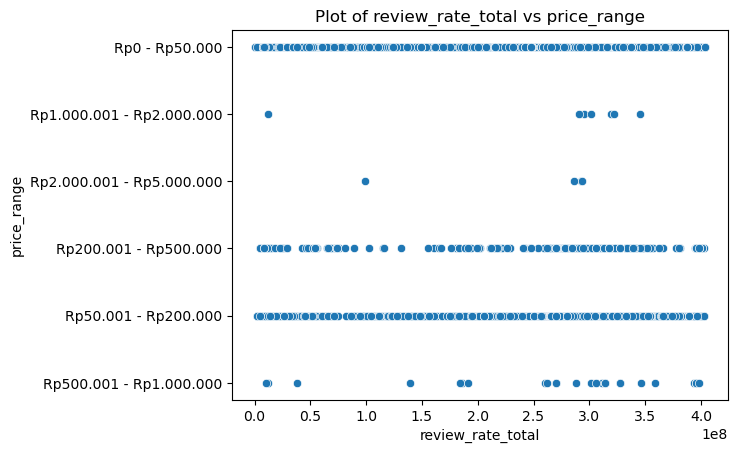

In [32]:
sns.scatterplot(x='is_product_id', y='price_range', data=fw_a)
plt.title('Plot of review_rate_total vs price_range')
plt.xlabel('review_rate_total')
plt.ylabel('price_range')
plt.show()

In [40]:
fw_a.columns

Index(['id', 'bundle', 'bundle_name', 'content', 'spell', 'content_date',
       'entity_id', 'label', 'is_price', 'is_product_id', 'is_shop_id',
       'fs_rating', 'fs_best_rating', 'fs_worst_rating', 'fs_review',
       'ss_shop_name', 'ss_location', 'sm_review_rate', 'sm_review_time',
       'sm_review_user_id', 'new_date', 'new_time', 'price_range',
       'review_rate_total', 'review_count', 'mean', 'group'],
      dtype='object')

In [81]:
ptest = fw_a
# df_a = d_with_index.loc["Perawatan Hewan", "Deals"]
def remove_unused_columns(fw_a):
  fw_a = fw_a.drop(columns='content')
  fw_a = fw_a.drop(columns='spell')
  fw_a = fw_a.drop(columns='content_date')
  fw_a = fw_a.drop(columns='label')
  fw_a = fw_a.drop(columns='is_price') #checked  p-value: 0.9732298405656153
  fw_a = fw_a.drop(columns='is_product_id')
  fw_a = fw_a.drop(columns='sm_review_rate')
  fw_a = fw_a.drop(columns='review_rate_total')
  fw_a = fw_a.drop(columns='review_count')
  # fw_a = fw_a.drop(columns='price_range') #checked p-value: 0.536934385265435
  fw_a = fw_a.drop(columns='is_shop_id')
  fw_a = fw_a.drop(columns='fs_best_rating')
  fw_a = fw_a.drop(columns='fs_worst_rating')
  fw_a = fw_a.drop(columns='fs_review')
  fw_a = fw_a.drop(columns='ss_shop_name') #checked p-value: 0.713440012703279
  fw_a = fw_a.drop(columns='sm_review_user_id')
  fw_a = fw_a.drop(columns='new_date') #checked p-value: 0.6407156292923146
  fw_a = fw_a.drop(columns='new_time')
  fw_a = fw_a.drop(columns='fs_rating')
  fw_a = fw_a.drop(columns='sm_review_time')
  fw_a = fw_a.drop(columns='mean') #checked p-value: 0.6407156292923146
  fw_a = fw_a.drop(columns='ss_location') #checked p-value: 0.2829193971218083
  fw_a = fw_a.drop(columns='bundle')
  # fw_a = fw_a.drop(columns='bundle_name')
  fw_a = fw_a.drop(columns='entity_id')
  fw_a = fw_a.drop(columns='id')


  return fw_a

ptest = remove_unused_columns(ptest)
ptest.head()

,bundle_name,price_range,group
4625,Fashion Wanita,Rp0 - Rp50.000,experimental
4014,Fashion Wanita,Rp0 - Rp50.000,experimental
4141,Fashion Wanita,Rp0 - Rp50.000,control
5020,Fashion Wanita,Rp0 - Rp50.000,experimental
4807,Fashion Wanita,Rp0 - Rp50.000,experimental


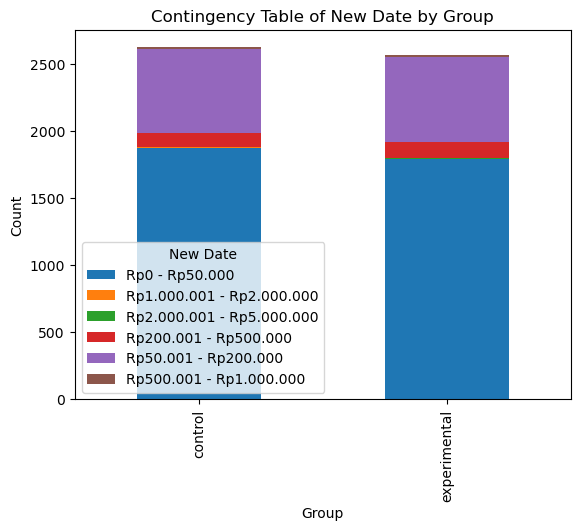

chi-squared statistic: 4.087175452421779
p-value: 0.536934385265435
There is not enough evidence to reject the null hypothesis.


In [82]:
from scipy.stats import chi2_contingency


# # Randomly assign the rows to the control or experimental group
# fw_a['group'] = np.random.choice(['control', 'experimental'], size=len(fw_a))

# Create a contingency table of the price_range categories by group
cont_table = pd.crosstab(ptest['group'], ptest['price_range'])

# Perform the chi-squared test
chi2_stat, p_value, dof, expected = chi2_contingency(cont_table)

# Plot the contingency table
cont_table.plot(kind='bar', stacked=True)
plt.title('Contingency Table of New Date by Group')
plt.xlabel('Group')
plt.ylabel('Count')
plt.legend(title='New Date')
plt.show()

# Print the results
print("chi-squared statistic: {}".format(chi2_stat))
print("p-value: {}".format(p_value))

# Determine if the results are statistically significant
if p_value < 0.05:
    print("The difference between the two groups is statistically significant.")
else:
    print("There is not enough evidence to reject the null hypothesis.")

In [79]:
from scipy import stats

# Separate the control and experimental groups
control = ptest[ptest['group'] == 'control']['mean']
experimental = ptest[ptest['group'] == 'experimental']['mean']

# Perform a two-sided t-test
t_stat, p_value = stats.ttest_ind(control, experimental, equal_var=False)


# Print the results
print("t-statistic: {}".format(t_stat))
print("p-value: {}".format(p_value))

# Determine if the results are statistically significant
if p_value < 0.05:
    print("The difference between the two groups is statistically significant.")
else:
    print("There is not enough evidence to reject the null hypothesis.")


t-statistic: -0.4667258475461702
p-value: 0.6407156292923146
There is not enough evidence to reject the null hypothesis.
